In [57]:
import pandas as pd
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
df = pd.read_csv("spotify_data.csv")
len(df)

106226

In [29]:
df.dropna(inplace=True)

In [30]:
df.head()

num    artist_name        track_name                track_id  popularity  \
0    0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6          68   
1    1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218          50   
2    2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F          57   
3    3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz          58   
4    4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8          54   

   year     genre  danceability  energy  key  loudness  mode  speechiness  \
0  2012  acoustic         0.483   0.303    4   -10.058     1       0.0429   
1  2012  acoustic         0.572   0.454    3   -10.286     1       0.0258   
2  2012  acoustic         0.409   0.234    3   -13.711     1       0.0323   
3  2012  acoustic         0.392   0.251   10    -9.845     1       0.0363   
4  2012  acoustic         0.430   0.791    6    -5.419     0       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.6940          0.000000    0.1150    0.139  133.406     240166.0   
1        0.4770          0.000014    0.0974    0.515  140.182     216387.0   
2        0.3380          0.000050    0.0895    0.145  139.832     158960.0   
3        0.8070          0.000000    0.0797    0.508  204.961     304293.0   
4        0.0726          0.019300    0.1100    0.217  171.864     244320.0   

   time_signature  
0             3.0  
1             4.0  
2             4.0  
3             4.0  
4             4.0

In [31]:
genre = list(df.genre.unique())
type(genre)

list

In [32]:
genre.sort()

In [33]:
genre_ids = {}
for i,name in enumerate(genre):
    print(i,name)
    genre_ids[name] = i


0 acoustic
1 afrobeat
2 alt-rock
3 ambient
4 black-metal
5 blues
6 breakbeat
7 cantopop
8 chicago-house
9 chill
10 classical
11 club
12 comedy
13 country
14 dance
15 dancehall
16 death-metal
17 deep-house
18 detroit-techno
19 disco
20 drum-and-bass
21 dub
22 dubstep
23 edm
24 electro
25 electronic
26 emo
27 folk
28 forro
29 french
30 funk
31 garage
32 german
33 gospel
34 goth
35 grindcore
36 groove
37 guitar
38 hard-rock
39 hardcore
40 hardstyle
41 heavy-metal
42 hip-hop
43 house
44 indian
45 indie-pop
46 industrial
47 jazz
48 k-pop
49 metal
50 metalcore
51 minimal-techno
52 new-age
53 opera
54 party
55 piano
56 pop
57 pop-film
58 power-pop
59 progressive-house
60 psych-rock
61 punk
62 punk-rock
63 rock
64 rock-n-roll
65 romance
66 sad
67 salsa
68 samba
69 sertanejo
70 show-tunes
71 singer-songwriter
72 ska
73 sleep
74 songwriter
75 soul
76 spanish
77 swedish
78 tango
79 techno
80 trance
81 trip-hop


In [34]:
genre_ids

{'acoustic': 0,
 'afrobeat': 1,
 'alt-rock': 2,
 'ambient': 3,
 'black-metal': 4,
 'blues': 5,
 'breakbeat': 6,
 'cantopop': 7,
 'chicago-house': 8,
 'chill': 9,
 'classical': 10,
 'club': 11,
 'comedy': 12,
 'country': 13,
 'dance': 14,
 'dancehall': 15,
 'death-metal': 16,
 'deep-house': 17,
 'detroit-techno': 18,
 'disco': 19,
 'drum-and-bass': 20,
 'dub': 21,
 'dubstep': 22,
 'edm': 23,
 'electro': 24,
 'electronic': 25,
 'emo': 26,
 'folk': 27,
 'forro': 28,
 'french': 29,
 'funk': 30,
 'garage': 31,
 'german': 32,
 'gospel': 33,
 'goth': 34,
 'grindcore': 35,
 'groove': 36,
 'guitar': 37,
 'hard-rock': 38,
 'hardcore': 39,
 'hardstyle': 40,
 'heavy-metal': 41,
 'hip-hop': 42,
 'house': 43,
 'indian': 44,
 'indie-pop': 45,
 'industrial': 46,
 'jazz': 47,
 'k-pop': 48,
 'metal': 49,
 'metalcore': 50,
 'minimal-techno': 51,
 'new-age': 52,
 'opera': 53,
 'party': 54,
 'piano': 55,
 'pop': 56,
 'pop-film': 57,
 'power-pop': 58,
 'progressive-house': 59,
 'psych-rock': 60,
 'punk': 61

In [35]:
df["genre_id"] = df.apply(lambda row: genre_ids[row.genre], axis=1)

In [36]:
df_sample = df.sample(10000)

In [174]:
X = df[["popularity", "genre_id", "energy", "valence"]].to_numpy()
X_sample = df_sample[["popularity", "genre_id", "energy", "valence"]].to_numpy()

In [175]:
X_sample.shape

(10000, 4)

In [176]:
fit = UMAP()
u = fit.fit_transform(X_sample)

/Users/msleder26/Library/Python/3.14/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/var/folders/gk/2hvlh5ld59v6q76_lk1sgxch0000gp/T/ipykernel_8103/3896398370.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(u[:, 0], u[:, 1], cmap='Spectral', s=1)


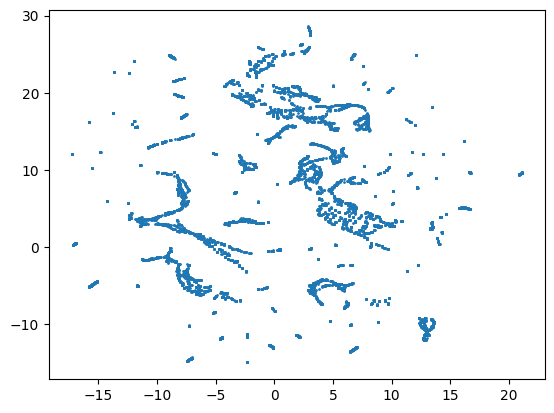

In [177]:
plt.scatter(u[:, 0], u[:, 1], cmap='Spectral', s=1)
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [178]:
X_norm = (X-X.mean(axis=0)) / X.std(axis=0)

In [179]:
X_norm.shape

(106225, 4)

In [180]:
cluster_count = []
inertia_scores = []

for n_clusters in range(2,50):
    km = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = km.fit_predict(X_norm)
    cluster_count.append(n_clusters)
    inertia_scores.append(km.inertia_)

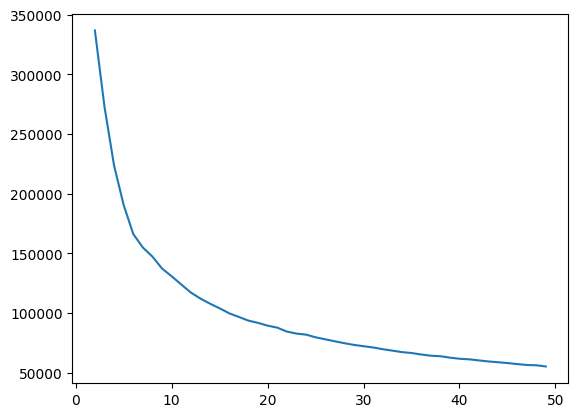

In [181]:
plt.plot(cluster_count, inertia_scores)

In [183]:
    km = KMeans(n_clusters = 30, random_state=42)
    cluster_labels = km.fit_predict(X_norm)

In [184]:
cluster_centers = km.cluster_centers_

In [185]:
cluster_centers

array([[-0.80611042,  1.2269679 ,  0.65062287,  1.48355763],
       [ 0.60361412,  1.10742932, -0.53063123,  0.22204721],
       [-0.62710559, -1.0341911 ,  0.85547887, -0.98539925],
       [-0.27978846, -0.79093442, -0.77937826,  0.89682445],
       [ 2.22943735,  0.67241669,  0.4367005 ,  1.01179276],
       [ 1.17995568,  0.48031852,  0.78837892, -0.19043334],
       [ 0.09083331, -1.23343925, -1.83002195, -1.13605655],
       [-0.58904469,  1.21422619,  0.6275659 ,  0.31797841],
       [ 0.3546385 , -0.75384178,  0.54007094,  1.3632682 ],
       [-0.1669466 ,  1.46562273,  0.63116227, -0.9282842 ],
       [ 0.10073766, -0.57716006,  0.71749444,  0.24418809],
       [-0.68051804, -1.14506551, -0.54922138, -0.61288919],
       [-0.75138806,  1.18128131, -0.48504633,  1.20765054],
       [ 1.44803103, -0.94614746, -1.44809371, -0.82458883],
       [ 0.94476046, -0.98251135,  0.83548062, -0.72287205],
       [-1.01037727,  0.14674876,  0.99884992, -1.06740063],
       [ 0.65712601,  0.

In [262]:
cluster_id = 0

In [284]:
ixs = np.asarray(cluster_labels==cluster_id).nonzero()
print(cluster_id,len(ixs[0]))
cluster_id+=1

5 3284


In [294]:
cluster_data = df[df.index.isin(ixs[0])]

In [295]:
cluster_data.groupby("genre")['genre'].count()

genre
electronic             1
emo                   15
folk                  10
forro                  4
french                28
funk                  20
garage                48
german                82
gospel                59
goth                  53
grindcore              1
groove                29
guitar                 2
hard-rock            180
hardcore             223
hardstyle             39
heavy-metal           31
hip-hop              410
house                 95
indian                28
indie-pop            184
industrial            57
jazz                  69
k-pop                263
metal                514
metalcore             76
minimal-techno        10
new-age               10
opera                  3
party                 18
piano                 36
pop                   16
pop-film              67
power-pop             11
progressive-house     20
psych-rock            33
punk                 187
punk-rock             25
rock                  69
rock-n-roll        

In [296]:
pd.set_option('display.max_rows', None)
cluster_data.groupby("artist_name")['artist_name'].count()

artist_name
10-FEET                                               2
116                                                   1
2 Chainz                                              6
2NE1                                                  3
2PM                                                   5
3 Pill Morning                                        4
31 Minutos                                            2
3OH!3                                                 1
4MEN                                                  1
4Minute                                               1
666                                                   2
7eventh Time Down                                     1
9MUSES                                                1
9mm Parabellum Bullet                                 1
A Day To Remember                                    10
A Lot Like Birds                                      1
A Pale Horse Named Death                              2
A Perfect Circle                    

In [297]:
pd.set_option('display.max_rows', None)
cluster_data.sort_values(by="artist_name")

num                                        artist_name  \
49571    49571                                            10-FEET   
49900    49900                                            10-FEET   
86104    86104                                                116   
32333    32333                                           2 Chainz   
86412    86412                                           2 Chainz   
86267    86267                                           2 Chainz   
32407    32407                                           2 Chainz   
86074    86074                                           2 Chainz   
32296    32296                                           2 Chainz   
35830    35830                                               2NE1   
35730    35730                                               2NE1   
35944    35944                                               2NE1   
35703    35703                                                2PM   
35574    35574                                                2PM   
89270    89270                                                2PM   
35683    35683                                                2PM   
35942    35942                                                2PM   
36670    36670                                     3 Pill Morning   
36468    36468                                     3 Pill Morning   
36744    36744                                     3 Pill Morning   
36791    36791                                     3 Pill Morning   
103139  103139                                         31 Minutos   
103151  103151                                         31 Minutos   
96761    96761                                              3OH!3   
89330    89330                                               4MEN   
35531    35531                                            4Minute   
24565    24565                                                666   
24603    24603                                                666   
83072    83072                                  7eventh Time Down   
35610    35610                                             9MUSES   
83278    83278                              9mm Parabellum Bullet   
89891    89891                                  A Day To Remember   
89965    89965                                  A Day To Remember   
89968    89968                                  A Day To Remember   
89962    89962                                  A Day To Remember   
89936    89936                                  A Day To Remember   
89964    89964                                  A Day To Remember   
89908    89908                                  A Day To Remember   
89922    89922                                  A Day To Remember   
89930    89930                                  A Day To Remember   
89938    89938                                  A Day To Remember   
83610    83610                                   A Lot Like Birds   
79880    79880                           A Pale Horse Named Death   
79887    79887                           A Pale Horse Named Death   
87925    87925                                   A Perfect Circle   
87990    87990                                   A Perfect Circle   
87719    87719                                               A Si   
33973    33973                                      A Silent Film   
33961    33961                                      A Silent Film   
90299    90299                                     A Skylit Drive   
90149    90149                                     A Skylit Drive   
90318    90318                                     A Skylit Drive   
83607    83607                                   A Wilhelm Scream   
83609    83609                                   A Wilhelm Scream   
83701    83701                                   A Wilhelm Scream   
83638    83638                                   A Wilhelm Scream   
83684    83684                                   A Wilhelm Scream   
86166    